In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mechanism_noise_generation import smooth_binary_mechanism_noise, binary_mechanism_noise

# Parameters

In [2]:
rho = 1e-2 # Privacy parameter in rho-zCDP
T = int(1e5) # Upper bound on the stream length

# Generate uniformly random input sequence $x\in\{0, 1\}^T$

In [3]:
x = np.random.choice(2, T, p=[0.5, 0.5])
x

array([0, 1, 1, ..., 1, 0, 1])

# Generate mechanism noise vectors $\in\mathbb{R}^T$

In [4]:
binary_mechanism_noise_vector = np.fromiter(binary_mechanism_noise(T, rho, dimensions=1), float)
binary_mechanism_noise_vector

array([-1456.31991371, -1146.99307865,  -733.91954102, ...,
        -186.30921564,   472.50152815, -3106.47396346])

In [5]:
smooth_binary_mechanism_noise_vector = np.fromiter(smooth_binary_mechanism_noise(T, rho, dimensions=1), float)
smooth_binary_mechanism_noise_vector

array([-2901.36927202,  -415.6135123 , -1014.26384826, ...,
        -782.25643619,  -509.79339636,    35.31880405])

# Compute true prefix sums and mechanism outputs

In [6]:
true_sum = np.cumsum(x)
binary_mechanism_output_vector = true_sum + binary_mechanism_noise_vector
smooth_binary_mechanism_output_vector = true_sum + smooth_binary_mechanism_noise_vector
t = np.arange(1, T+1)

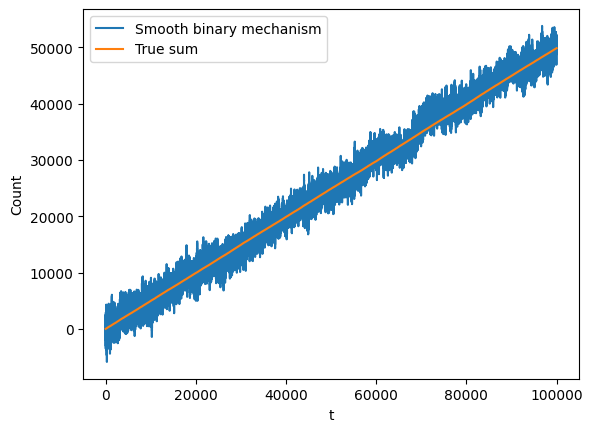

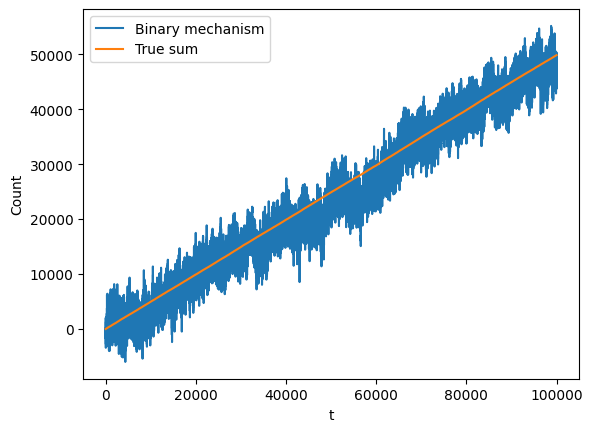

In [7]:
plt.figure()
plt.plot(t, smooth_binary_mechanism_output_vector, label='Smooth binary mechanism')
plt.plot(t, true_sum, label='True sum')
plt.xlabel("t")
plt.ylabel("Count")
plt.legend()
plt.show()

plt.figure()
plt.plot(t, binary_mechanism_output_vector, label='Binary mechanism')
plt.plot(t, true_sum, label='True sum')
plt.xlabel("t")
plt.ylabel("Count")
plt.legend()
plt.show()